In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
data = np.loadtxt('../data/sizedistribution.dat');
vals = data[:,1]
num = data[:,0]

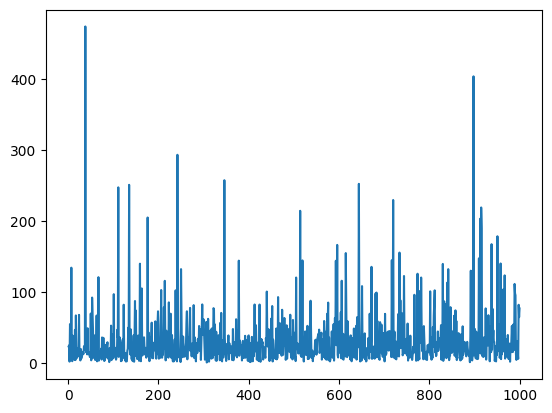

In [3]:
pl.plot(num,vals)

Isn't it clear that the plot is not like "random variable" ?

(array([565., 255.,  81.,  39.,  21.,  13.,  10.,   3.,   2.,   3.,   2.,
          3.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  1.2073    ,  23.72266667,  46.23803333,  68.7534    ,
         91.26876667, 113.78413333, 136.2995    , 158.81486667,
        181.33023333, 203.8456    , 226.36096667, 248.87633333,
        271.3917    , 293.90706667, 316.42243333, 338.9378    ,
        361.45316667, 383.96853333, 406.4839    , 428.99926667,
        451.51463333, 474.03      ]),
 <BarContainer object of 21 artists>)

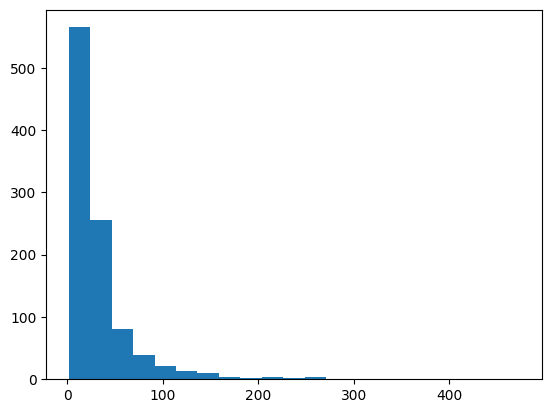

In [4]:
pl.hist(vals,21)

(array([  1.,   4.,  20.,  23.,  35.,  48.,  67.,  97., 104., 107., 113.,
        119.,  95.,  57.,  45.,  26.,  21.,   6.,   9.,   1.,   2.]),
 array([0.18838646, 0.47280952, 0.75723257, 1.04165563, 1.32607868,
        1.61050174, 1.89492479, 2.17934784, 2.4637709 , 2.74819395,
        3.03261701, 3.31704006, 3.60146312, 3.88588617, 4.17030923,
        4.45473228, 4.73915534, 5.02357839, 5.30800145, 5.5924245 ,
        5.87684756, 6.16127061]),
 <BarContainer object of 21 artists>)

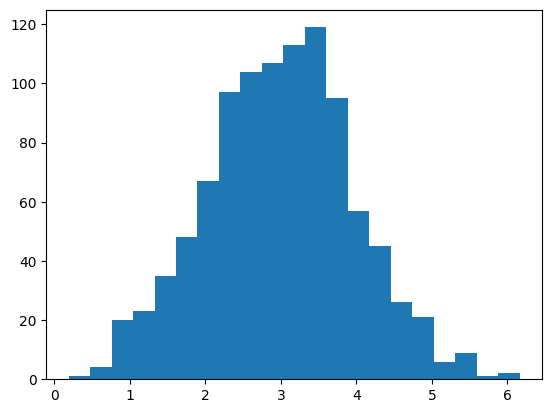

In [5]:
pl.hist(np.log(vals),21)

In [6]:
newvals = np.log(vals)

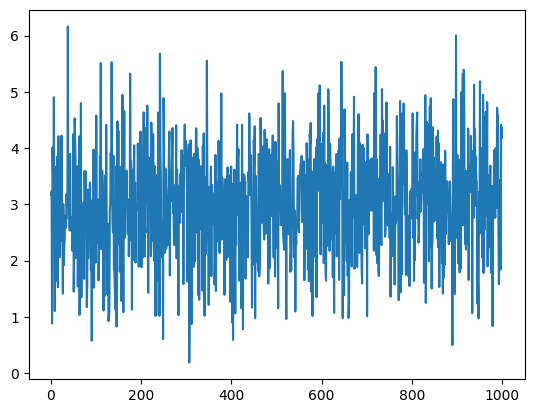

In [7]:
pl.plot(num,newvals)

In [8]:
print("Wrong:")
print ("Average =  %.3f" %np.mean(vals))
print ("Standard Deviation = %.3f" %np.std(vals))

print ("Correct:")
print ("Average =  %.3f" % np.exp(np.mean(newvals)))
print ("Standard Deviation = %.3f" % np.exp(np.std(newvals,ddof=1)))

Wrong:
Average =  32.048
Standard Deviation = 39.773
Correct:
Average =  19.980
Standard Deviation = 2.637


In [9]:
from scipy.stats import lognorm, norm
param = norm.fit(newvals)

In [10]:
x = np.linspace(np.min(newvals),np.max(newvals),100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])


(array([0.0100454 , 0.08036319, 0.15737791, 0.30471041, 0.39679323,
        0.38842207, 0.20927913, 0.08873435, 0.03348466, 0.0050227 ]),
 array([0.18838646, 0.78567488, 1.38296329, 1.98025171, 2.57754012,
        3.17482854, 3.77211695, 4.36940537, 4.96669378, 5.5639822 ,
        6.16127061]),
 <BarContainer object of 10 artists>)

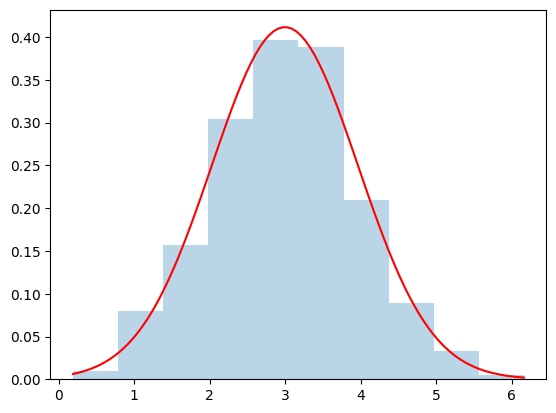

In [11]:
pl.figure()
pl.plot(x,pdf_fitted,'r-')
pl.hist(newvals,density=1,alpha=.3)

In [12]:
print(param) # log normal
print(np.exp(param))

(2.9947081784485516, 0.9690344007390227)
[19.97952858  2.63539849]
